<h1><center>So, you want to learn how to make plots...</center></h1>
<div>
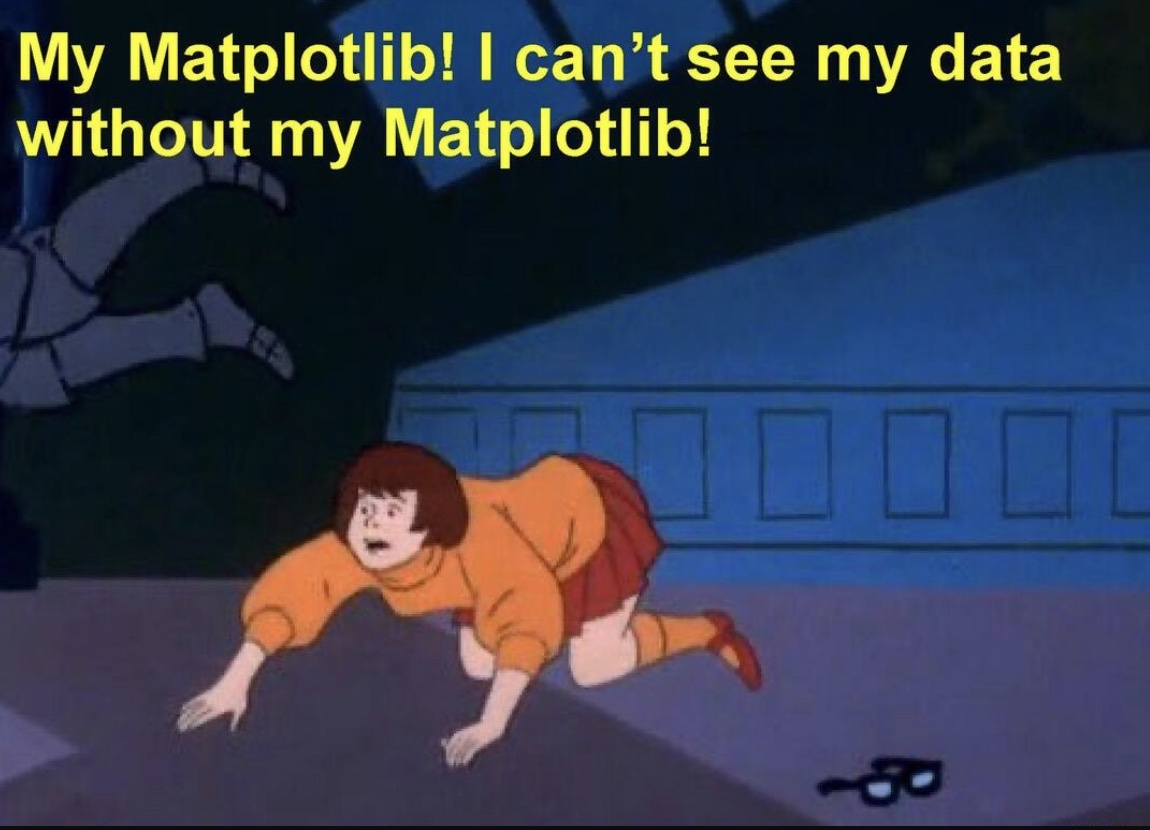
</div>

## Foundations of plotting
Why should we care about making "good" plots? What makes a plot good or bad? How can we make plots using the tools available in Python? The purpose of this notebook is to introduce you to the foundations of plotting, and hopefully to begin answering each of these questions. Of course, what makes a plot good or bad is ultimately subjective, but we will look at some examples and go over best practices. Let's start with the first question: Why should we care about making good plots? And more specifically, why should astronomers care? Well, here is an example:

In [58]:
# Ignore the details of this for now
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

I really love sweets. Say I spend 11 days tracking the amount of sweets I eat. At the end of each day, I record the number of sweets I've eaten. I also rank how much I'm craving more sweets between 0-100, with 0 being not at all and 100 being the maximum amount one could crave anything. After glancing over my results, I suspect the more sweets I eat in a day, the more I crave. Imagine you are my penpal. I want to send you a summary of my results, but my printer ran out of ink and I can't explain anything outside of sending just one image! Which figure should I send? Take note of what qualities make one figure better or worse than the other.

In [29]:
# Ignore the details of this for now
sweets_eaten = np.linspace(0,10,11)
noise = np.random.normal(0,4,11)
craving_rank = sweets_eaten**2 + noise

Text(0.5, 0, 'Number of Sweets Eaten')

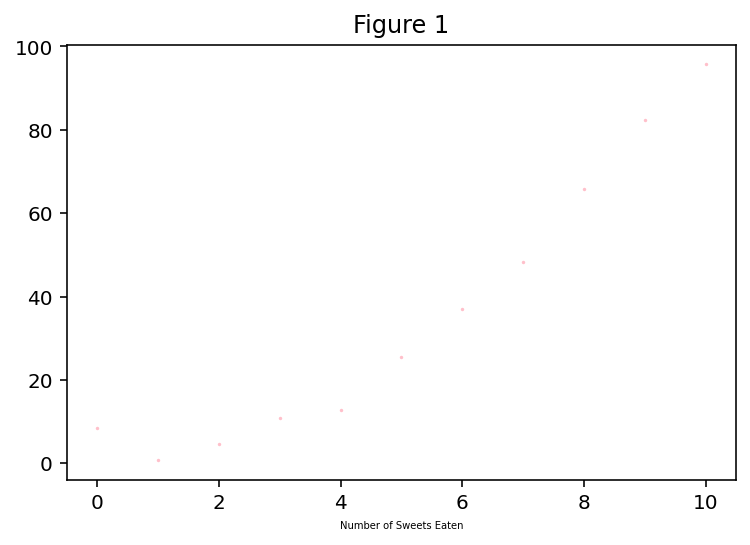

In [118]:
plt.title('Figure 1') # Set title
plt.scatter(sweets_eaten, craving_rank, s=.5, c='pink') # Plot a scatter plot with size .5, pink points 
plt.xlabel('Number of Sweets Eaten', size=5) # Label the x-axis with size 5 font

Text(0, 0.5, 'Craving Rank (0-100)')

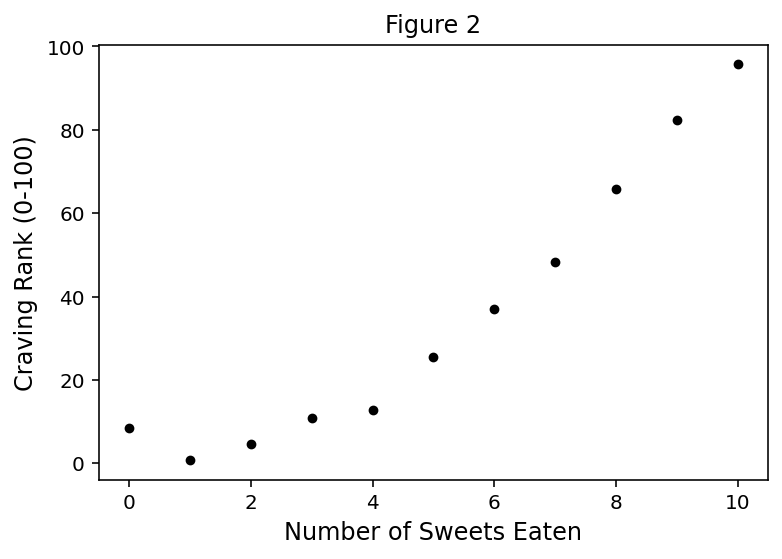

In [60]:
plt.title('Figure 2') # Set title
plt.scatter(sweets_eaten, craving_rank, s=15, c='black') # Plot a scatter plot with size 15, black points 
plt.xlabel('Number of Sweets Eaten', size=12) # Label the x-axis with size 12 font
plt.ylabel('Craving Rank (0-100)', size=12) # Label the y-axis with size 12 font

So, it's pretty clear that Figure 2 shows the more sweets I've eaten, the more sweets I crave. The scatter points are dark and large enough to see. Both axes are labeled, so you don't have to guess what I'm plotting -- and the labels are large enough to read. In comparison, I imagine if I sent you Figure 1. You might guess it had something to do with the amount of sweets I eat (if you had your glasses on). But alas, the color of the data points combined with their tiny size makes them almost impossible to see. To summarize, a good figure will almost always have these two things in common:

- Clear, readable axis labels (a title is usually optional)
- Points/lines/etc. that are easily seen ([what if someone is colorblind?](https://www.cta-observatory.org/wp-content/uploads/2020/10/CTA_ColourBlindness_BestPractices-1.pdf))

Now, this may all seem a bit silly, but imagine if instead of plotting the number of sweets eaten versus my craving rank, I was plotting the likelihood of a planet being habitable versus it's radius, for example. If I want to convince my colleagues that we should be targeting big planets in our search for extraterrestial life, then my figure better be understandable! This is why as an astronomer, you will spend lots of time thinking about how to make an effective plot.

## How to plot in Python
Okay, hopefully I have convinced you that thinking about plotting is a worthy endeavor. Now you may be wondering: How do I actually make plots? Well, let's start from the basics. You will be able to import a variety of [packages](https://python-course.eu/python-tutorial/packages.php) to help you. We will go over a few that I use regularly in this notebook. You can see that I already imported most of these things above, but we will go ahead and do this again for demonstration:

In [66]:
%config InlineBackend.figure_format = 'retina' # This is optional. It just makes Jupyter render higher-quality images, i.e. crisper figures
import matplotlib.pyplot as plt # You will want to import this before you do any plotting
import numpy as np # Numpy is helpful for math and working with data in arrays
import pandas as pd # This is optional. Helpful for reading in data and working in dataframes, if you wish!

Note, there are many, many packages out there you could import for plotting ([here are a few more popular examples](https://www.askpython.com/python/python-plotting-and-graph-libraries)). These are just the what I would import also as a default. It is a good practice to do all your importing in one cell, at the top of your Jupyter Notebook -- that way it is easy to keep track of what you have imported, and you can be sure it gets run before anything else. Now, let's load some real data! 

In [106]:
filepath = "apogee_test.csv" # Filepath where you saved this file
apogee_data = pd.read_csv(filepath) # Pandas reads in the data and stores it as a DataFrame object

In [107]:
# I can look at the DataFrame by just typing it's name -- no print necessary!
apogee_data

,ID,Teff,logg,[Fe/H],[Mg/Fe],[Si/Fe],[Ca/Fe],[Ni/Fe]
0,76,4221.3010,1.839191,0.137580,-0.019162,-0.016243,-0.043576,0.013822
1,268,4136.1750,1.358368,-0.621530,0.338353,0.255891,0.193525,0.101982
2,463,4665.7640,2.367905,-0.102490,0.146587,0.088233,0.027107,0.005763
3,584,4090.2244,0.807137,-1.390100,0.239763,0.190671,0.309465,0.039293
4,672,4688.5770,2.594087,-0.264560,0.095324,0.016989,0.067489,0.011933
5,900,4042.8160,1.053668,-0.545630,0.247553,0.170421,0.022326,0.047362
6,1172,4640.8213,2.419425,0.017320,0.051621,0.039162,-0.029684,0.011681
7,1439,4546.2350,2.409282,0.268510,0.030987,-0.001237,-0.036628,0.050732
8,1582,4964.9520,3.122193,0.041100,-0.063408,-0.025645,0.033342,-0.007418
9,1848,4892.4740,2.546959,-0.213310,0.054813,0.045198,0.027469,0.010523


While the exact details of the this dataset are not important right now, this is a subset of data from the APOGEE survey. The survey makes high-resolution, spectroscopic observations of Milky Way red giany stars. For purposes, we will be plotting 'Teff' (the effective temperature of a star), 'logg' (the surface gravity of a star), and '[Fe/H]' (the metallicity or metal content of a star). Don't worry if you don't understand what these, or the other columns, mean -- we're just focused on learning how to plot today. Let's take a look at some of the different ways we can visualize data using Matplotlib.

In [108]:
# This is how you access the data stored in each column from the Pandas DataFrame
# The format is: DataFrameName['ColumnName']
teff =  apogee_data['Teff']
logg = apogee_data['logg']
feh = apogee_data['[Fe/H]']

Let's start with a histogram. Say I want to see what the distribution of metallicities is for my subset of APOGEE stars. Here is how I would do this using Matplotlib. Note, there are lots of parameters we can use to customize the appearance of the figure. Take a look at the 'For reference' link to see a comprehensive list. For example, we can change the color by changing,

> plt.hist(feh) 

to 

> plt.hist(feh, color='Green')

All of the parameters can be "passed" in this manner (comma-separated), although there may be rules for different parameters (e.g., color only takes colors in string ([what is a string?](https://www.w3schools.com/python/python_datatypes.asp)) format: color="color name" or color="[hex code](https://marketing.istockphoto.com/blog/hex-colors-guide/)"). Always look at the documentation (reference link) if you get confused. Let's do an example together.

Text(0, 0.5, 'Count')

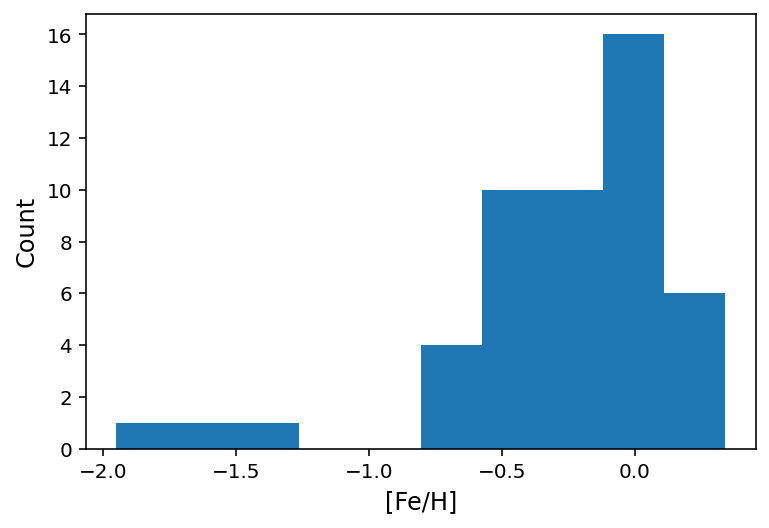

In [109]:
# Here is a simple histogram:
# For reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(feh)
plt.xlabel('[Fe/H]', size=12)
plt.ylabel('Count', size=12)

Now let's look at scatter plots and lineplots. I want to plot log surface gravity versus effective temperature for all of the stars in my sample. How might I do that using Matplotlib? Let's take a look:

Text(0, 0.5, 'Log Surface Gravity')

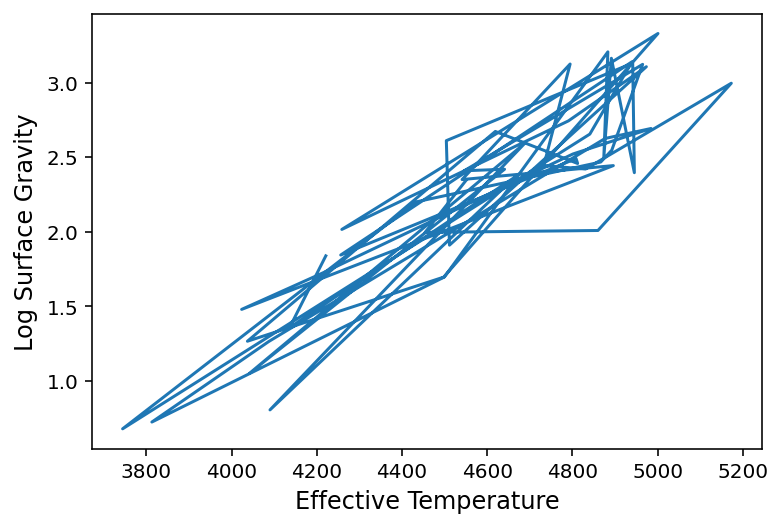

In [110]:
# Here is a simple line plot:
# For reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(teff, logg)
plt.xlabel('Effective Temperature', size=12)
plt.ylabel('Log Surface Gravity', size=12)

Oh no! This doesn't look right at all. Well, 

> plt.plot()

connects lines -- this may be good for plotting trajectories, or orbits for example, but not these data points. Here we should use,

> plt.scatter()

instead. This is why it is important to think about what you're plotting and what type of figure makes the most sense, e.g., communicates the most information. Sometimes this takes some trial and error, and that's okay! Now, let's make that scatter plot.

Text(0, 0.5, 'Log Surface Gravity')

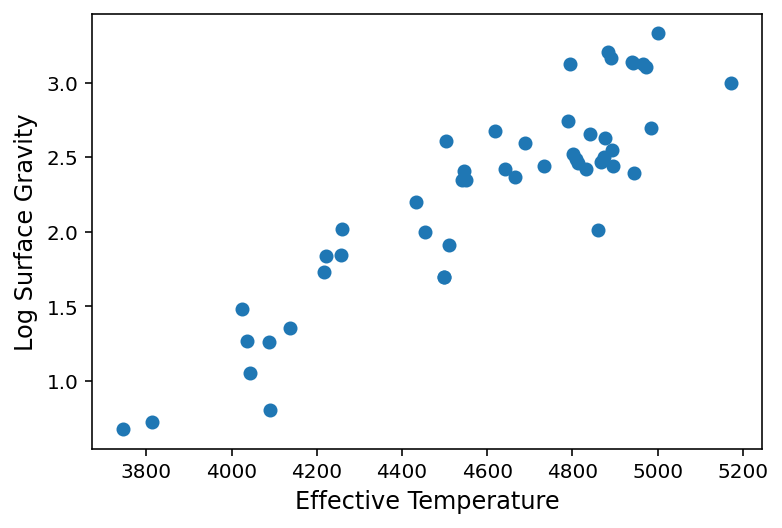

In [111]:
# Here is a simple scatterplot:
# For reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(teff, logg)
plt.xlabel('Effective Temperature', size=12)
plt.ylabel('Log Surface Gravity', size=12)

Ah, much better! So, we have covered some basic ways to visualize data using Matplotlib. Note, there are many, many other ways you can choose to represent your data. [Here](https://matplotlib.org/stable/plot_types/index.html) are some more resources on the types of plots that are supported by Matplotlib. However, keep in mind that there are plenty of plotting packages beyond this as well! The next section will cover some more advanced plotting techniques.

## Advanced techniques

A colorbar allows you to map colors to scalar values, i.e., color-code your data points by a third parameter. This can be a nice way to show 3D information in 2D. For example, I could plot the lifetime weights of an elephant versus its heights and color-code the points by age. This allows me to visualize the trends between weight, height, and age all at the same time! Here is some code to get you started using colorbars.

In [112]:
# This function helps plot colorbars! Taken from here:
# https://joseph-long.com/writing/colorbars/
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.1)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    plt.subplots_adjust(wspace=.3)
    return cbar

Text(0, 0.5, 'Log Surface Gravity')

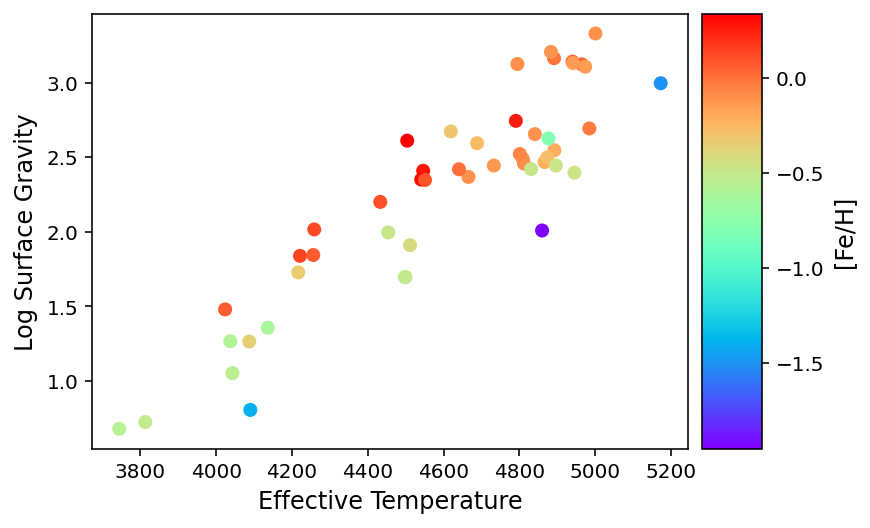

In [113]:
# 'cmap' specifies the colormap (i.e., color scheme), see all options here:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
im = plt.scatter(teff, logg, c=feh, cmap='rainbow') # Color-codes by metallicity using a rainbow colormap
cbar = colorbar(im) # Calls helpful colorbar function
cbar.set_label('[Fe/H]', size=12) # Labels the colorbar
plt.xlabel('Effective Temperature', size=12)
plt.ylabel('Log Surface Gravity', size=12)

What if I want to make two plots side by side? Or quickly change their dimension/size? Well, instead of just running a plotting command, we can define a Figure and Axes object and use plt.subplots,

> fig, axs = plt.subplots(Number of Rows, Number of Columns, figsize=(Length,Height)) 

See the example below and note the changes:

>plt.scatter() 

becomes

>axs.scatter()

and 

>plt.xlabel() and plt.ylabel()

become

>axs.set_xlabel() and axs.set_ylabel()


Text(0, 0.5, 'Log Surface Gravity')

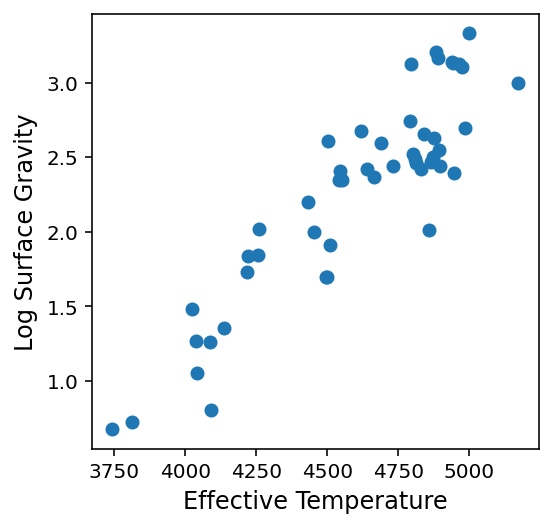

In [114]:
# For reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axs = plt.subplots(1, 1, figsize=(4,4)) # fig is our Figure object and axs is our Axes object
axs.scatter(teff, logg) # Plotting command
axs.set_xlabel('Effective Temperature', size=12) # Label axes
axs.set_ylabel('Log Surface Gravity', size=12)

We can also use this to make multi-panel plots... Note that each panel now has its own axis, which can be specified by indexing from 0 to the (total number of panels - 1). See the example below.

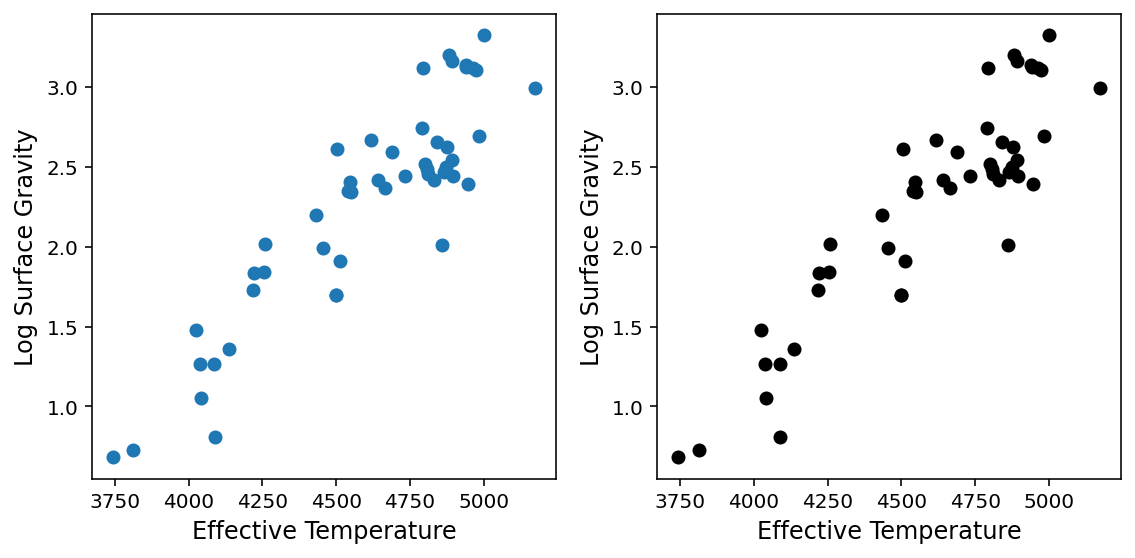

In [115]:
fig, axs = plt.subplots(1, 2, figsize=(8,4)) # fig is our Figure object and axs is our Axes object

axs[0].scatter(teff, logg) # Plotting command
axs[0].set_xlabel('Effective Temperature', size=12) # Label axes
axs[0].set_ylabel('Log Surface Gravity', size=12)

axs[1].scatter(teff, logg, color='black') # Plotting command
axs[1].set_xlabel('Effective Temperature', size=12) # Label axes
axs[1].set_ylabel('Log Surface Gravity', size=12)

plt.tight_layout(h_pad=1) # Makes a pad/space between the figures

## Practice
Now, here are some plotting exercises to try as you have time. Note, some of them require Googling! These are for practice, not for a grade, so don't let them stress you out! You can always ask a peer or mentor if you get stuck, and you do not have to attempt any of them -- but it's good practice!

- Re-create a plot above using plt.subplots()
- Reverse the rainbow in my color-coded plot
- Make a plot and add a colorbar using a different colormap
- Re-create a scatter plot above and change the marker style
- Re-create a scatter plot above and change the transparency (Hint: Google "scatter plot alpha")
- Change the range of the colorbar in my color-coded plot
- Try a new plot type!
- Make a 4 x 4 subplot (two panels on the top and two on the bottom)
- Try plotting a new column from the Pandas FataFrame (Hint: Ignore the ID column)
- Color a plot using a hexcode instead of a color name